In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "D:/에어비앤비/파리/listings.csv"
df = pd.read_csv(path)

In [3]:
print(df.shape)
df.head()

(84397, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
columns_to_keep = ['id', 'host_id','host_is_superhost','host_total_listings_count',
'neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms','beds','amenities',
'price','minimum_nights','maximum_nights','number_of_reviews_l30d',
'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_location','review_scores_value','reviews_per_month']

# 해당 컬럼만 선택
df = df[columns_to_keep]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           84397 non-null  int64  
 1   host_id                      84397 non-null  int64  
 2   host_is_superhost            84306 non-null  object 
 3   host_total_listings_count    84390 non-null  float64
 4   neighbourhood_cleansed       84397 non-null  object 
 5   room_type                    84397 non-null  object 
 6   accommodates                 84397 non-null  int64  
 7   bathrooms                    60959 non-null  float64
 8   bedrooms                     77480 non-null  float64
 9   beds                         60828 non-null  float64
 10  amenities                    84397 non-null  object 
 11  price                        60917 non-null  object 
 12  minimum_nights               84397 non-null  int64  
 13  maximum_nights  

In [7]:
df.columns = ['숙소_id', '호스트_id','슈퍼호스트','숙소_수','숙소_지역','숙소_유형','수용_인원수','욕실수','침실수','침대수','어메너티','숙소_가격','최소_숙박일','최대_숙박일','리뷰수','30일_리뷰수','리뷰점수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수','평균_리뷰수']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84397 non-null  int64  
 1   호스트_id       84397 non-null  int64  
 2   슈퍼호스트        84306 non-null  object 
 3   숙소_수         84390 non-null  float64
 4   숙소_지역        84397 non-null  object 
 5   숙소_유형        84397 non-null  object 
 6   수용_인원수       84397 non-null  int64  
 7   욕실수          60959 non-null  float64
 8   침실수          77480 non-null  float64
 9   침대수          60828 non-null  float64
 10  어메너티         84397 non-null  object 
 11  숙소_가격        60917 non-null  object 
 12  최소_숙박일       84397 non-null  int64  
 13  최대_숙박일       84397 non-null  int64  
 14  리뷰수          84397 non-null  int64  
 15  30일_리뷰수      58827 non-null  float64
 16  리뷰점수         58793 non-null  float64
 17  숙소_정확성_리뷰점수  58797 non-null  float64
 18  숙소_청결도_리뷰점수  58784 non-null  float64
 19  숙소_체

In [9]:
df = df.dropna(subset=['슈퍼호스트'])
df = df.dropna(subset=['숙소_수'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84299 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84299 non-null  int64  
 1   호스트_id       84299 non-null  int64  
 2   슈퍼호스트        84299 non-null  object 
 3   숙소_수         84299 non-null  float64
 4   숙소_지역        84299 non-null  object 
 5   숙소_유형        84299 non-null  object 
 6   수용_인원수       84299 non-null  int64  
 7   욕실수          60891 non-null  float64
 8   침실수          77394 non-null  float64
 9   침대수          60760 non-null  float64
 10  어메너티         84299 non-null  object 
 11  숙소_가격        60849 non-null  object 
 12  최소_숙박일       84299 non-null  int64  
 13  최대_숙박일       84299 non-null  int64  
 14  리뷰수          84299 non-null  int64  
 15  30일_리뷰수      58750 non-null  float64
 16  리뷰점수         58716 non-null  float64
 17  숙소_정확성_리뷰점수  58720 non-null  float64
 18  숙소_청결도_리뷰점수  58707 non-null  float64
 19  숙소_체크인_리뷰

In [14]:
df.columns

Index(['숙소_id', '호스트_id', '슈퍼호스트', '숙소_수', '숙소_지역', '숙소_유형', '수용_인원수', '욕실수',
       '침실수', '침대수', '어메너티', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

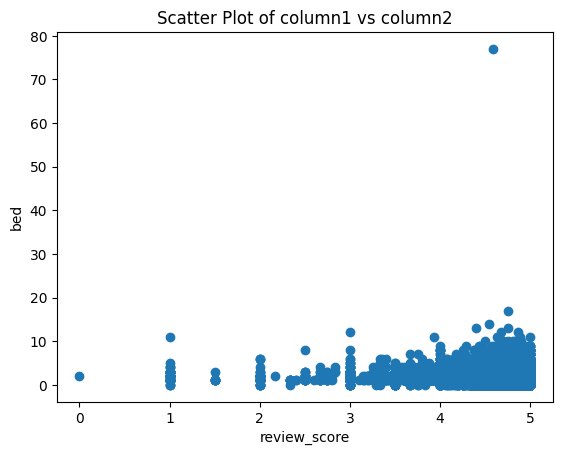

In [16]:
# x 축에 'column1', y 축에 'column2'를 사용하여 산점도 그리기
plt.scatter(df['리뷰점수'], df['침대수'])

# 그래프에 타이틀 및 레이블 추가
plt.title('Scatter Plot of column1 vs column2')
plt.xlabel('review_score')
plt.ylabel('bed')

# 그래프 보여주기
plt.show()


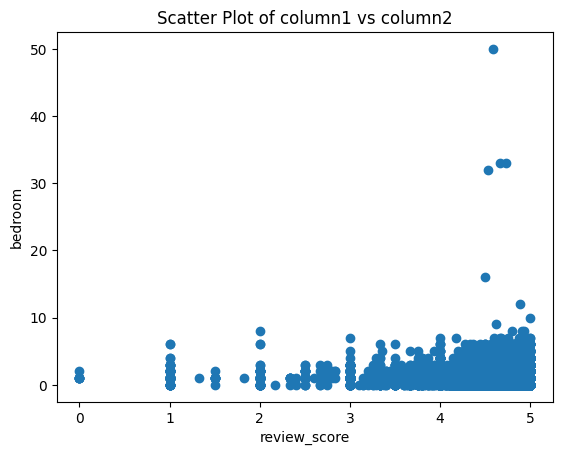

In [17]:
plt.scatter(df['리뷰점수'], df['침실수'])

# 그래프에 타이틀 및 레이블 추가
plt.title('Scatter Plot of column1 vs column2')
plt.xlabel('review_score')
plt.ylabel('bedroom')

# 그래프 보여주기
plt.show()

In [20]:
import seaborn as sns

c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49689 (\N{HANGUL SYLLABLE SUG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\User

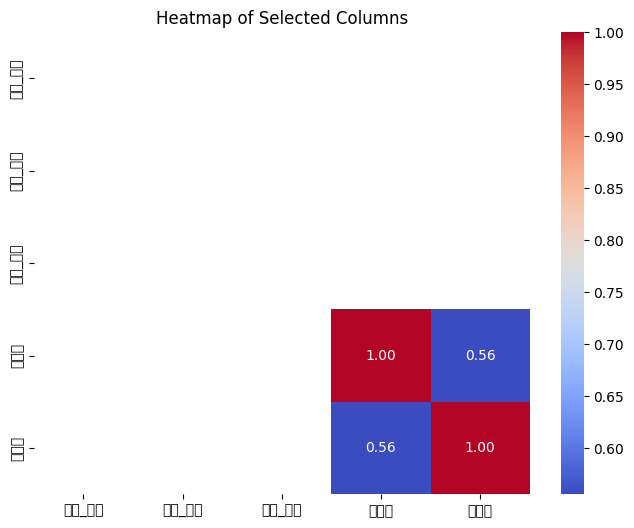

In [28]:
selected_columns = df[['숙소_지역', '숙소_유형', '숙소_가격', '침대수', '침실수']]

# 상관관계 매트릭스 계산
corr_matrix = selected_columns.corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Selected Columns')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84299 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84299 non-null  int64  
 1   호스트_id       84299 non-null  int64  
 2   슈퍼호스트        84299 non-null  object 
 3   숙소_수         84299 non-null  float64
 4   숙소_지역        84299 non-null  object 
 5   숙소_유형        84299 non-null  object 
 6   수용_인원수       84299 non-null  int64  
 7   욕실수          60891 non-null  float64
 8   침실수          77394 non-null  float64
 9   침대수          60760 non-null  float64
 10  어메너티         84299 non-null  object 
 11  숙소_가격        60849 non-null  object 
 12  최소_숙박일       84299 non-null  int64  
 13  최대_숙박일       84299 non-null  int64  
 14  리뷰수          84299 non-null  int64  
 15  30일_리뷰수      58750 non-null  float64
 16  리뷰점수         58716 non-null  float64
 17  숙소_정확성_리뷰점수  58720 non-null  float64
 18  숙소_청결도_리뷰점수  58707 non-null  float64
 19  숙소_체크인_리뷰

In [26]:
# 문자열 데이터가 있는지 확인
non_numeric = df[pd.to_numeric(df['침대수'], errors='coerce').isna()]
print(non_numeric)


                     숙소_id     호스트_id 슈퍼호스트  숙소_수              숙소_지역  \
4                    39948     171483     t   2.0             Bourse   
5                    40143     172322     f   2.0         Popincourt   
11                   42507     142478     f   3.0    Buttes-Chaumont   
20                  178188     852658     f   1.0       Ménilmontant   
24                   45967     204922     f   1.0             Bourse   
...                    ...        ...   ...   ...                ...   
80052  1089714103986173954  489964484     f  74.0  Buttes-Montmartre   
80158  1089792608267990973  561357977     f   1.0  Buttes-Montmartre   
80159  1090573134171110492   57780871     f   1.0         Popincourt   
80162  1089799445843880628  106802916     f   5.0       Ménilmontant   
80306  1090661597250162632  556259587     f   4.0              Passy   

                 숙소_유형  수용_인원수  욕실수  침실수  침대수  ... 리뷰수 30일_리뷰수  리뷰점수  \
4         Private room       2  NaN  NaN  NaN  ...   3    4.86 

In [27]:
# 문자열 데이터를 NaN으로 변환
df['침대수'] = pd.to_numeric(df['침대수'], errors='coerce')

# 필요하다면 NaN 값들을 특정 값으로 대체
df['침대수'].fillna(value=0, inplace=True)

# 문자열 데이터를 NaN으로 변환
df['숙소_지역'] = pd.to_numeric(df['숙소_지역'], errors='coerce')

# 필요하다면 NaN 값들을 특정 값으로 대체
df['숙소_지역'].fillna(value=0, inplace=True)

# 문자열 데이터를 NaN으로 변환
df['숙소_유형'] = pd.to_numeric(df['숙소_유형'], errors='coerce')

# 필요하다면 NaN 값들을 특정 값으로 대체
df['침실수'].fillna(value=0, inplace=True)

df['침실수'] = pd.to_numeric(df['침실수'], errors='coerce')

# 필요하다면 NaN 값들을 특정 값으로 대체
df['침실수'].fillna(value=0, inplace=True)

df['숙소_가격'] = pd.to_numeric(df['숙소_가격'], errors='coerce')

# 필요하다면 NaN 값들을 특정 값으로 대체
df['숙소_가격'].fillna(value=0, inplace=True)




C:\Users\evol0\AppData\Local\Temp\ipykernel_33036\2010975172.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['침대수'].fillna(value=0, inplace=True)
C:\Users\evol0\AppData\Local\Temp\ipykernel_33036\2010975172.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh